## 파이썬으로 RNN 구현하기

- 은닉 상태  
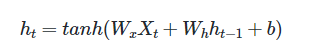

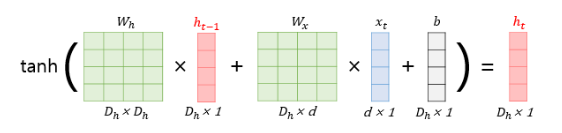

```
# 아래의 코드는 의사 코드(pseudocode)로 실제 동작하는 코드가 아님. 

hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화
for input_t in input_length: # 각 시점마다 입력을 받는다.
    output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산
    hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태가 된다.
```

- 입력 데이터의 길이는 곧 총 시점의 수(timesteps)

In [49]:
import numpy as np

timesteps = 10 # 시점의 수. NLP에서는 문장의 길이 

input_size = 4 # 입력의 차원, NLP에서는 보통 단어 백터의 차원

hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량


inputs = np.random.random((timesteps, input_size)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화

In [50]:
Wx = np.random.random((hidden_size, input_size))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

In [51]:
total_hidden_states = []

# 메모리 셀 동작 


for input_t in inputs:
    output_t = np.tanh(np.dot(Wx, input_t) +  np.dot(Wh, hidden_state_t) + b)
    # # Wx * Xt + Wh * Ht-1 + b(bias)
    total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을  계속해서 추적
    print(np.shape(total_hidden_states))
    hidden_state_t = output_t
    
total_hidden_states = np.stack(total_hidden_states, axis=0)

print(total_hidden_states)
# (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.59203208 0.92904714 0.63984889 0.73479486 0.93057825 0.69872403
  0.65378111 0.71867463]
 [0.99849847 0.99901866 0.99887605 0.99934035 0.99971311 0.99673961
  0.99880339 0.99804148]
 [0.9994088  0.99995878 0.99976465 0.99994255 0.99997168 0.99960693
  0.99992915 0.99980695]
 [0.99891749 0.99991888 0.99970325 0.99988657 0.99994288 0.99939812
  0.99990685 0.99958429]
 [0.99980453 0.99997705 0.99980962 0.9999787  0.99999045 0.99987333
  0.99994895 0.99988241]
 [0.9996472  0.99995158 0.99981017 0.99995238 0.99997791 0.99963234
  0.99992536 0.99980329]
 [0.99986033 0.99996618 0.99988809 0.9999829  0.99998506 0.99963148
  0.99995505 0.99994166]
 [0.99980591 0.99996422 0.99985152 0.99998097 0.99998207 0.99972561
  0.99995748 0.99992143]
 [0.99988576 0.99998848 0.99986143 0.9999903  0.99999414 0.99989164
  0.99996657 0.99996059]
 [0.99977007 0.9999413  0.99984083 0.99996142 0.99998036 0.99964285
  0.9999265  0.99980957]

## 파이토치의 nn.RNN()

In [52]:
import torch
import torch.nn as nn

In [53]:
input_size = 5 # 입력의 크기
hidden_size = 8 # 은닉 상태의 크기: 하이퍼파라미터

In [56]:
#  입력 텐서는 (배치 크기 × 시점의 수 × 매 시점마다 들어가는 입력)의 크기를 가짐
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [61]:
#  atch_first=True를 통해서 입력 텐서의 첫번째 차원이 배치 크기임을 알려줍
cell = nn.RNN(input_size, hidden_size, batch_first=True)

In [65]:
outputs, _status = cell(inputs)

In [66]:
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


In [67]:
print(_status.shape) # 최종 time-step의 hidden_state

torch.Size([1, 1, 8])


In [68]:
_status 

tensor([[[-0.2411,  0.0387, -0.2667, -0.0318,  0.2155, -0.4854,  0.4365,
          -0.0232]]], grad_fn=<StackBackward0>)

#### 깊은 순환 신경망(Deep Recurrent Neural Network)

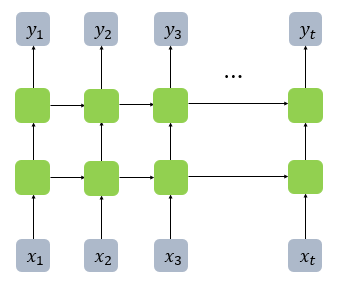

- 깊은 순환 신경망을 파이토치로 구현할 때는 nn.RNN()의 인자인 num_layers에 값을 전달하여 층을 쌓음

In [69]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [70]:
cell = nn.RNN(input_size=5, hidden_size=8, num_layers=2, batch_first=True)

In [71]:
outputs, _status = cell(inputs)

In [74]:
_status.shape # (층의 개수, 배치 크기, 은닉 상태의 크기)

torch.Size([2, 1, 8])

#### 양방향 순환 신경망(Bidirectional Recurrent Neural Network)

-  출력값을 예측할 때 이전 시점의 데이터뿐만 아니라, 이후 데이터로도 예측할 수 있다는 아이디어에 기반

```
Exercise is very effective at [          ] belly fat.

1) reducing
2) increasing
3) multiplying
```

- 정답을 찾기 위해서는 이전에 나온 단어들만으로는 부족
- 실제 문제에서는 과거 시점의 데이터만 고려하는 것이 아니라 향후 시점의 데이터에 힌트가 있는 경우도 많음

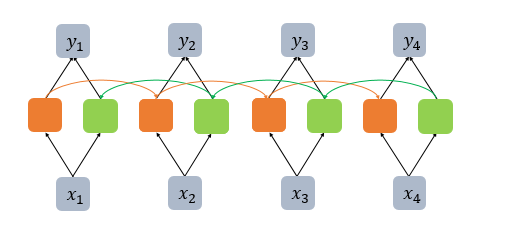

- 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용
- 첫번째 메모리 셀은 앞에서 배운 것처럼 앞 시점의 은닉 상태(Forward States)를 전달받아 현재의 은닉 상태를 계산(주황)
- 두번째 메모리 셀은 앞에서 배운 것과는 다릅니다. 앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States)를 전달 받아 현재의 은닉 상태를 계산(초록)
- 이 두 개의 값 모두가 출력층에서 출력값을 예측하기 위해 사용

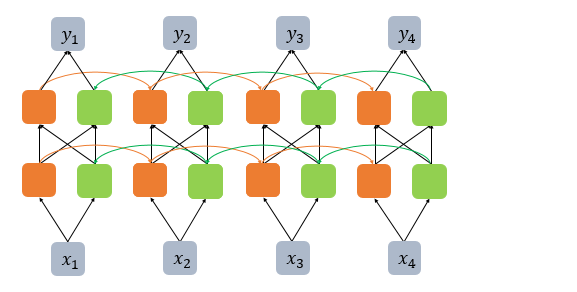

- 깊은(deep) 양방향 순환 신경망도 가능

- 양방향 순환 신경망을 파이토치로 구현할 때는 nn.RNN()의 인자인 bidirectional에 값을 True로 전달하면 된다.

In [75]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [76]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True, bidirectional = True)

In [77]:
outputs, _status = cell(inputs)

In [78]:
print(outputs.shape) 

torch.Size([1, 10, 16])


- 첫번째 리턴값의 크기는 단뱡 RNN 셀 때보다 은닉 상태의 크기의 값이 두 배가 되었음
- 여기서는 (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)의 크기를 가짐 
- 이는 양방향의 은닉 상태 값들이 연결(concatenate)되었기 때문

In [81]:
print(_status.shape) # (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)

torch.Size([4, 1, 8])


## 문자 단위 RNN(Char RNN)

- RNN의 입출력의 단위가 단어 레벨(word-level)이 아니라 문자 레벨(character-level)
- RNN을 다대다 구조로 구현해보자

In [223]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

- apple을 입력받으면 pple!를 출력하는 RNN을 구현

In [224]:
input_str = 'apple'
label_str = 'pple!'

char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 5


In [225]:
input_size = vocab_size # 입력의 크기는 문자 집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1

In [226]:
# 문자 집합에 고유한 정수 부여 
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


In [227]:
# 정수로부터 문자를 얻을 수 있는 사전
index_to_char = {}

for key, value in char_to_index.items():
    index_to_char[value] = key

print(index_to_char)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}


In [228]:
# 정수로 변환

x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]

print(x_data)
print(y_data)

[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


In [229]:
# 배치 차원 추가
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


In [230]:
#  각 문자들을 원-핫 벡터로 바꾸자 

In [231]:
x_data[0][1]

4

In [232]:
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


In [233]:
X = torch.FloatTensor(x_one_hot)

In [234]:
Y = torch.LongTensor(y_data)

In [235]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])


- 모델 구현 

In [236]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)
        
        # 출력층
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True)
        

    def forward(self, x):
        x, _staus = self.rnn(x)
        x = self.fc(x)
        
        return x

In [237]:
net = Net(input_size, hidden_size, output_size)

In [238]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([1, 5, 5])


In [239]:
print(outputs.view(-1, input_size).shape) # 2차원 텐서로 변환

torch.Size([5, 5])


In [240]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([1, 5])
torch.Size([5])


In [241]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [242]:
outputs = net(X)

In [243]:
outputs.data

tensor([[[-0.2188, -0.3051, -0.0710,  0.2775,  0.0743],
         [-0.3072, -0.3190,  0.1138,  0.4032,  0.2005],
         [-0.2946, -0.3902,  0.0583,  0.3767,  0.2031],
         [-0.1879, -0.3174, -0.0751,  0.5840,  0.4285],
         [-0.4086, -0.2821,  0.0244,  0.4114,  0.0233]]])

In [244]:
result = outputs.data.numpy().argmax(axis=1)

In [245]:
np.squeeze(result)

array([3, 4, 1, 3, 3])

In [247]:
# 100번의 에포크 

for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
    
    loss.backward() # 기울기 계산
    optimizer.step() 
    
   
    # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드.
    result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-step 별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  4.227039607940242e-05 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
1 loss:  4.227039607940242e-05 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
2 loss:  4.217503737891093e-05 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
3 loss:  4.212735439068638e-05 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
4 loss:  4.2079675040440634e-05 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
5 loss:  4.198430906399153e-05 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
6 loss:  4.1912790038622916e-05 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
7 loss:  4.18412710132543e-05 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
8 loss:  4.179358802502975e-05 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
9 loss:  4.169822932453826e

##### 좀더 응용

In [248]:
import torch
import torch.nn as nn
import torch.optim as optim

In [249]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [250]:
sentence

"if you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea."

In [251]:
char_set = list(set(sentence))
char_dic = {c : i for i, c in enumerate(char_set)}

In [252]:
char_dic # # 공백도 여기서는 하나의 원소

{'f': 0,
 't': 1,
 'a': 2,
 'u': 3,
 'r': 4,
 'l': 5,
 's': 6,
 'p': 7,
 '.': 8,
 'c': 9,
 'm': 10,
 'i': 11,
 'k': 12,
 'g': 13,
 'n': 14,
 'y': 15,
 'h': 16,
 ',': 17,
 "'": 18,
 'd': 19,
 'o': 20,
 ' ': 21,
 'b': 22,
 'w': 23,
 'e': 24}

In [253]:
dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

문자 집합의 크기 : 25


In [254]:
# 하이퍼파라미터 설정
hidden_size = dic_size

sequence_length = 10  # 임의 숫자 지정
learning_rate = 0.1

- 임의로 지정한 sequence_length 값인 10의 단위로 샘플들을 잘라서 데이터를 만듬 

In [255]:
# 데이터 구성 
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1 :i + sequence_length + 1]
    print(i, x_str, '->', y_str)
    
    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [256]:
print(x_data[0]) # if you wan에 해당됨.
print(y_data[0] )# f you want에 해당됨.

[11, 0, 21, 15, 20, 3, 21, 23, 2, 14]
[0, 21, 15, 20, 3, 21, 23, 2, 14, 1]


In [257]:
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [258]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([170, 10, 25])
레이블의 크기 : torch.Size([170, 10])


- 모델 구현 

In [259]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는 dic_size와 같음.
        super(Net, self).__init__()

        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)
          
    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [260]:
net = Net(dic_size, hidden_size, 2) # 이번에는 층을 두 개 쌓습니다.

In [261]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [262]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([170, 10, 25])


In [263]:
print(outputs.view(-1, dic_size).shape) # 2차원 텐서로 변환.

torch.Size([1700, 25])


In [264]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([170, 10])
torch.Size([1700])


In [267]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()
    
    if i % 50 == 0:
        # results의 텐서 크기는 (170, 10)
        results = outputs.argmax(dim=2)
        predict_str = ""
        for j, result in enumerate(results):
            if j == 0: # 처음에는 예측 결과를 전부 가져오지만
                predict_str += ''.join([char_set[t] for t in result])
            else: # 그 다음에는 마지막 글자만 반복 추가
                predict_str += char_set[result[-1]]

        print(predict_str)
        print()

t                                                                                                                                                                                  

l                                                                                                                                                                                  



#### 장단기 메모리(Long Short-Term Memory, LSTM)

- RNN의 장기 의존성 문제(the problem of Long-Term Dependencies)


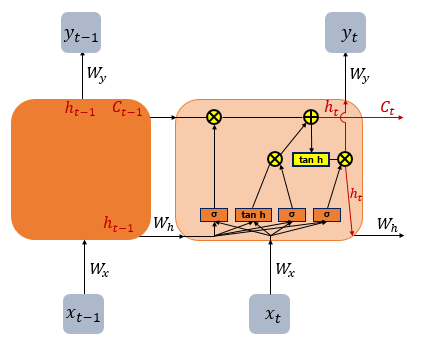

1) 입력 게이트 : 현재 정보를 기억하기 위한 게이트  
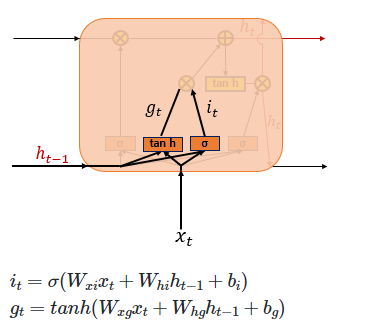
- 이 두 개의 값을 가지고 이번에 선택된 기억할 정보의 양을 정함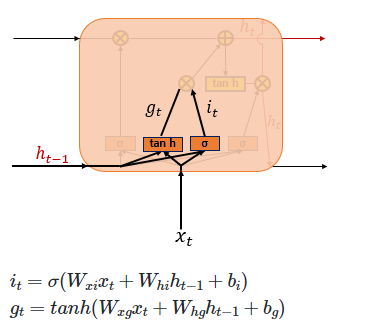

2) 삭제 게이트 : 기억을 삭제하기 위한 게이트  <-  0에 가까울수록 정보가 많이 삭제된 것이고 1에 가까울수록 정보를 온전히 기억한 것  
 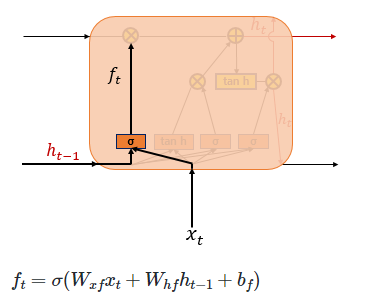
- 입력 게이트아 삭제 게이트를 가지고 셀 상태(장기 상태)를 계산  

3) 셀 상태(장기 상태)    
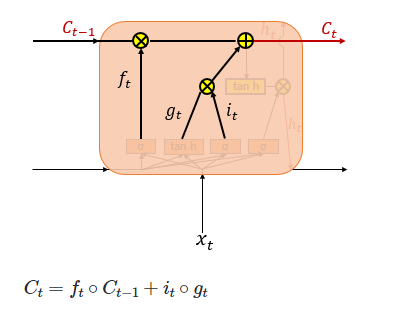

- 삭제 게이트의 값이 0에 가까우면(삭제 게이트가 닫히면) 현재 시점의 셀 상태값을 결정하는 영향력이 0이됨
- 반대로 입력 게이트의 값이 0에 가까우면 현재 시점의 셀 상태값은 오직 이전 시점의 셀 상태 값에만 의존함 
- 결과적으로 삭제 게이트는 이전 시점의 입력을 얼마나 반영할지 의미하고, 입력 게이트는 현재 시점의 입력을 얼마나 반영할지를 결정 

4) 출력 게이트와 은닉 상태(단기 상태)  
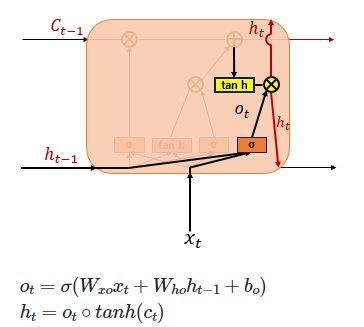

In [269]:
nn.LSTM(input_dim, hidden_size, batch_fisrt=True)  

#### 게이트 순환 유닛(Gated Recurrent Unit, GRU)
- LSTM의 장기 의존성 문제에 대한 해결책을 유지하면서, 은닉 상태를 업데이트하는 계산을 줄임
- GRU는 성능은 LSTM과 유사하면서 복잡했던 LSTM의 구조를 간단화 

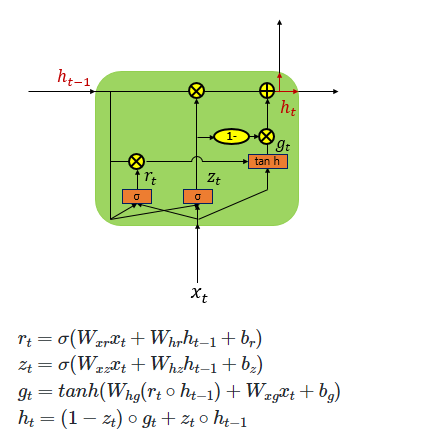

- 데이터 양이 적을 때는 매개 변수의 양이 적은 GRU가 조금 더 낫고, 데이터 양이 더 많으면 LSTM이 더 낫다고 함

In [ ]:
nn.GRU(input_dim, hidden_size, batch_fisrt=True)  